# 자연어 기반 기후기술분류 AI 대회 EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
train = pd.read_csv('GTC_dataset/train.csv', index_col = 0)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174304 entries, 0 to 174303
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   제출년도       174304 non-null  int64 
 1   사업명        174304 non-null  object
 2   사업_부처명     174304 non-null  object
 3   계속과제여부     174304 non-null  object
 4   내역사업명      174304 non-null  object
 5   과제명        174304 non-null  object
 6   요약문_연구목표   171302 non-null  object
 7   요약문_연구내용   171303 non-null  object
 8   요약문_기대효과   171253 non-null  object
 9   요약문_한글키워드  171276 non-null  object
 10  요약문_영문키워드  171217 non-null  object
 11  label      174304 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 17.3+ MB


In [8]:
train.head()

,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
index,,,,,,,,,,,,
0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0
2,2016,중소기업기술혁신개발,중소기업청,신규,혁신기업기술개발,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n* 소비자 및 바...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,* 국내 독자적인 비목질계 셀룰로오스 자원의 파이버 및 부직포 제조 등의 기술 확보...,"기능성 샐룰로오스 파이버,천연섬유,기능성 부직포,뷰티&amp;케어 제품,미용 솜","functional cellulose fiber,natural fiber,funct...",0
3,2018,창업성장기술개발(R&D),중소벤처기업부,신규,창업사업화연계과제,소화기 암 진단용 분자영상 형광프로브 개발,# 암특이적 바이오마커 발굴 및 바이오마커에 대한 프로브 개발\n\n\n1) 소화...,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,# 암 진단기술의 차별성: 소화기 암 특이 프로브 개발\n\n\n- 최근 체외진단시...,"분자 진단,형광 조영제,프로브,항체,대장암","Molecular diagnosis,Fluorescence,probe,antibod...",0
4,2016,이공학개인기초연구지원,교육부,계속,기본연구지원,위암환자의 항암제반응예측을 위한 BRCA 발현검사,"수술이 불가능한 위암환자는 생존기간은 10개월 안팎에 지나지 않고, 항암화학요법에 ...",-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,-본 연구는 파라핀보관조직에서 in situ hybridization로 mRNA 및...,"BRCA,제자리부합법,조직미세배열,마이크로RNA,위암,항암제반응,젊은 연령/가족성 위암","BRCA,Insituhybridization,tissuemicroarray,micr...",0


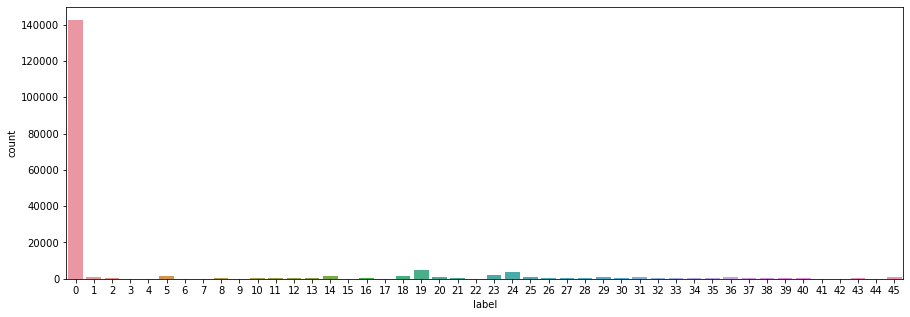

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(train.label)

# label이 0인 NaN 들일 때 키워드 EDA 분석

In [21]:
labels = pd.read_csv('GTC_dataset/labels_mapping.csv')

In [22]:
labels

,label,소분류
0,0,00. NaN
1,1,01. 원자력 발전
2,2,02. 핵융합 발전
3,3,03. 청정화력발전·효율화
4,4,04. 수력
5,5,05. 태양광
6,6,06. 태양열
7,7,07. 지열
8,8,08. 풍력
9,9,09. 해양에너지


In [23]:
label0 = train[train.label == 0 ]

## 과제형 + 요약문_연구목표 + 요약문_연구내용 + 요약문_기대효과 + 요약문_한글키워드

In [27]:
label0_str = label0['과제명']+label0['요약문_연구목표']+label0['요약문_연구내용']+label0['요약문_한글키워드']

In [28]:
label0_str

index
1         대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2         비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
3         소화기 암 진단용 분자영상 형광프로브 개발#  암특이적 바이오마커 발굴 및 바이오마...
4         위암환자의 항암제반응예측을 위한 BRCA 발현검사수술이 불가능한 위암환자는 생존기간...
6         마이크로시스를 적용한 옥내·외 겸용 광케이블 개발1. 2차년도 개발목표\n\n\n ...
                                ...                        
174296    남성 생식세포 특이단백질 분석 및 정자 기능 연구남성생식 시스템에서, (1-2차년도...
174299    혈관내막 증식을 치료하기 위한 표적분자 발굴증식성 혈관질환과 염증반응과의 관련성이 ...
174300    삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...
174301    식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구지난 10년여 동안 100여종에...
174303    광학적 위상 제어 기법을 적용한 디지털 홀로그래피 현미경 시스템 개발본 연구의 목적...
Length: 142571, dtype: object

## 한국 NLP 패키지 : konlpy 활용
https://konlpy.org/ko/v0.5.2/

In [29]:
import konlpy

In [30]:
from konlpy.tag import Kkma

In [31]:
kkma = Kkma()

In [39]:
label0_str.iloc[0]

'대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축에 관한 연구최종목표:  TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된 유전자를 통한 TRAIL 기반 항암화학요법 예측 유전자 지도 구축.\n\n1) 환자조직/동물실험/세포실험을 통해 대장암에 특이적으로 조절되어 있는 선천적 TRAIL 내성 유발 유전자를 발굴하고 저항성 극복 기전을 규명\n2) 환자조직/동물실험/세포실험을 통해 대장암에 특이적으로 조절되어 있는 후천적 TRAIL 내성 유발 유전자를 발굴하고 저항성 극복 기전을 규명\n3) 1, 2차년도 연구결과를 토대로 선천적/후천적 TRAIL 내성 모두에 관여하는 전천후 TRAIL 내성 유발 유전자를 발굴하고 저항성 극복 기전을 규명\n\n추후 TRAIL 기반 항암화학요법 치료효과 예측 kit 및 표적 치료제 개발 연구를 타연구기관과 공동추진할 계획임.1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자 선별\n2) 대장암 환자조직을 이용하여 후보 유전자의 발현과 DR 발현 양상 분석\n3) 후보 유전자 발현 조절을 이용한 표적 가능성 및 TRAIL 내성 제어 기전 규명\n4) 표적 유전자 knock out 마우스 구축 및 동물모델을 통한 후보 유전자 표적 가능성 검증\n5) 선천적 TRAIL 내성 예측인자 발굴\n\n2차년도\n1) Microarray를 통한 후천적 TRAIL 내성 표적 후보 유전자 선별  \n2) 대장암 환자조직을 이용하여 후보 유전자의 발현과 DR 발현 양상 분석\n3) 후보 유전자 발현 조절을 이용한 표적 가능성 및 TRAIL 내성 제어 기전 규명\n4) 표적 유전자 knock out 마우스 구축 및 동물모델을 통한 후보 유전자 표적 가능성 검증\n5) 후천적 TRAIL 내성 예측인자 발굴\n\n3차년도\n1) 1, 2차년도 연구결과를 토대로 선천적 내성과 후천적 내성 모두에서 조절되는 전천후 TRAIL 내성 유전자 탐색\n2) 대장암 환자조직을 

In [40]:
kkma.nouns(label0_str.iloc[0])

['대장암',
 '내성',
 '표적',
 '인자',
 '발굴',
 '반응',
 '예측',
 '유전자',
 '지도',
 '구축',
 '연구',
 '연구최종목표',
 '최종',
 '목표',
 '감수성',
 '내성제어',
 '제어',
 '기전',
 '기반',
 '항암',
 '항암화학요법',
 '화학',
 '요법',
 '1',
 '환자',
 '환자조직',
 '조직',
 '동물',
 '동물실험',
 '실험',
 '세포',
 '세포실험',
 '특이',
 '조절',
 '선천적',
 '유발',
 '저항성',
 '극복',
 '규명',
 '2',
 '후천적',
 '3',
 '2차년',
 '차년',
 '연구결과',
 '결과',
 '토대',
 '모두',
 '관여',
 '전천후',
 '추후',
 '치료',
 '치료효과',
 '효과',
 '치료제',
 '개발',
 '연구기관',
 '기관',
 '공동',
 '공동추진',
 '추진',
 '계획',
 '1차년',
 '후보',
 '선별',
 '대장',
 '암',
 '이용',
 '발현',
 '양상',
 '분석',
 '가능성',
 '4',
 '마우스',
 '동물모델',
 '모델',
 '검증',
 '5',
 '예측인자',
 '3차년',
 '탐색',
 '변화',
 '표지',
 '표지자의',
 '자의',
 '발굴대장암',
 '항암제',
 '세포사멸',
 '사멸',
 '유전자발굴']